In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import folium
import mapclassify
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score,ConfusionMatrixDisplay,classification_report,confusion_matrix
from sklearn import tree

In [6]:
obj = gpd.read_file("D:\\00_INPE\\0_DISSERTACAO\\0_BASE_VETOR\\CLUSTERS_AMB_URB\\clusters_env_urb_santarem.shp")

In [7]:
interpol = gpd.read_file("D:\\00_INPE\\0_DISSERTACAO\\0_BASE_VETOR\\SOCIOECONOMICO\\socieconomical_indicators.shp")

In [8]:
interpol

,ID,avg_inv_ho,p_per_hous,dr_15,dr_65,sex_ratio,literacy,inad_sewag,inad_water,inap_waste,geometry
0,5,5346.224208,2.786641,0.242406,0.000000,1.183136,1.021059,4.254414,89.342693,0.000000,"POLYGON ((752688.911 9722816.546, 752689.345 9..."
1,6,5346.224208,2.786641,0.242406,0.000000,1.183136,1.021059,4.254414,89.342693,0.000000,"POLYGON ((752789.095 9722816.113, 752789.529 9..."
2,10,5346.224208,2.786641,0.242406,0.000000,1.183136,1.021059,4.254414,89.342693,0.000000,"POLYGON ((753189.831 9722814.381, 753190.263 9..."
3,11,5346.224208,2.786641,0.242406,0.000000,1.183136,1.021059,4.254414,89.342693,0.000000,"POLYGON ((753290.015 9722813.949, 753290.447 9..."
4,12,5346.224208,2.786641,0.242406,0.000000,1.183136,1.021059,4.254414,89.342693,0.000000,"POLYGON ((753390.199 9722813.517, 753390.631 9..."
...,...,...,...,...,...,...,...,...,...,...,...
6296,14338,666.269750,4.274483,0.323209,0.087498,1.196032,0.854897,97.702465,84.726357,7.633005,"POLYGON ((751430.790 9733012.497, 751431.221 9..."
6297,14339,666.269750,4.274483,0.323209,0.087498,1.196032,0.854897,97.702465,84.726357,7.633005,"POLYGON ((751530.947 9733012.067, 751531.377 9..."
6298,14340,666.269750,4.274483,0.323209,0.087498,1.196032,0.854897,97.702465,84.726357,7.633005,"POLYGON ((751631.104 9733011.636, 751631.534 9..."
6299,14392,666.269750,4.274483,0.323209,0.087498,1.196032,0.854897,97.702465,84.726357,7.633005,"POLYGON ((751230.907 9733113.276, 751231.338 9..."


In [9]:
obj

,ID,C_ENV,C_URB,C_ENV_URB,geometry
0,5,1,0,4,"POLYGON ((752688.911 9722816.546, 752689.345 9..."
1,6,2,0,4,"POLYGON ((752789.095 9722816.113, 752789.529 9..."
2,10,1,1,2,"POLYGON ((753189.831 9722814.381, 753190.263 9..."
3,11,1,1,2,"POLYGON ((753290.015 9722813.949, 753290.447 9..."
4,12,1,1,2,"POLYGON ((753390.199 9722813.517, 753390.631 9..."
...,...,...,...,...,...
6296,14338,3,1,0,"POLYGON ((751430.790 9733012.497, 751431.221 9..."
6297,14339,3,1,0,"POLYGON ((751530.947 9733012.067, 751531.377 9..."
6298,14340,3,1,0,"POLYGON ((751631.104 9733011.636, 751631.534 9..."
6299,14392,3,1,0,"POLYGON ((751230.907 9733113.276, 751231.338 9..."


In [10]:
obj =  obj[['ID','C_ENV_URB']].merge(interpol, left_on='ID', right_on = 'ID')

In [11]:
obj.columns

Index(['ID', 'C_ENV_URB', 'avg_inv_ho', 'p_per_hous', 'dr_15', 'dr_65',
       'sex_ratio', 'literacy', 'inad_sewag', 'inad_water', 'inap_waste',
       'geometry'],
      dtype='object')

In [12]:
obj = obj[['ID','C_ENV_URB','avg_inv_ho',
       'p_per_hous', 'inad_sewag',
       'inad_water', 'inap_waste', 'dr_15', 'dr_65', 'sex_ratio', 'literacy', 'geometry']]

In [13]:
obj

,ID,C_ENV_URB,avg_inv_ho,p_per_hous,inad_sewag,inad_water,inap_waste,dr_15,dr_65,sex_ratio,literacy,geometry
0,5,4,5346.224208,2.786641,4.254414,89.342693,0.000000,0.242406,0.000000,1.183136,1.021059,"POLYGON ((752688.911 9722816.546, 752689.345 9..."
1,6,4,5346.224208,2.786641,4.254414,89.342693,0.000000,0.242406,0.000000,1.183136,1.021059,"POLYGON ((752789.095 9722816.113, 752789.529 9..."
2,10,2,5346.224208,2.786641,4.254414,89.342693,0.000000,0.242406,0.000000,1.183136,1.021059,"POLYGON ((753189.831 9722814.381, 753190.263 9..."
3,11,2,5346.224208,2.786641,4.254414,89.342693,0.000000,0.242406,0.000000,1.183136,1.021059,"POLYGON ((753290.015 9722813.949, 753290.447 9..."
4,12,2,5346.224208,2.786641,4.254414,89.342693,0.000000,0.242406,0.000000,1.183136,1.021059,"POLYGON ((753390.199 9722813.517, 753390.631 9..."
...,...,...,...,...,...,...,...,...,...,...,...,...
6296,14338,0,666.269750,4.274483,97.702465,84.726357,7.633005,0.323209,0.087498,1.196032,0.854897,"POLYGON ((751430.790 9733012.497, 751431.221 9..."
6297,14339,0,666.269750,4.274483,97.702465,84.726357,7.633005,0.323209,0.087498,1.196032,0.854897,"POLYGON ((751530.947 9733012.067, 751531.377 9..."
6298,14340,0,666.269750,4.274483,97.702465,84.726357,7.633005,0.323209,0.087498,1.196032,0.854897,"POLYGON ((751631.104 9733011.636, 751631.534 9..."
6299,14392,0,666.269750,4.274483,97.702465,84.726357,7.633005,0.323209,0.087498,1.196032,0.854897,"POLYGON ((751230.907 9733113.276, 751231.338 9..."


In [14]:
obj.iloc[:,2:-1]

,avg_inv_ho,p_per_hous,inad_sewag,inad_water,inap_waste,dr_15,dr_65,sex_ratio,literacy
0,5346.224208,2.786641,4.254414,89.342693,0.000000,0.242406,0.000000,1.183136,1.021059
1,5346.224208,2.786641,4.254414,89.342693,0.000000,0.242406,0.000000,1.183136,1.021059
2,5346.224208,2.786641,4.254414,89.342693,0.000000,0.242406,0.000000,1.183136,1.021059
3,5346.224208,2.786641,4.254414,89.342693,0.000000,0.242406,0.000000,1.183136,1.021059
4,5346.224208,2.786641,4.254414,89.342693,0.000000,0.242406,0.000000,1.183136,1.021059
...,...,...,...,...,...,...,...,...,...
6296,666.269750,4.274483,97.702465,84.726357,7.633005,0.323209,0.087498,1.196032,0.854897
6297,666.269750,4.274483,97.702465,84.726357,7.633005,0.323209,0.087498,1.196032,0.854897
6298,666.269750,4.274483,97.702465,84.726357,7.633005,0.323209,0.087498,1.196032,0.854897
6299,666.269750,4.274483,97.702465,84.726357,7.633005,0.323209,0.087498,1.196032,0.854897


In [15]:
dummy = 0

obj.iloc[:,2:-1] = obj.iloc[:,2:-1].fillna(dummy)
obj.iloc[:,2:-1] = obj.iloc[:,2:-1].round(3)


#obj.iloc[:,2:-1] =(obj.iloc[:,2:-1] - obj.iloc[:,2:-1].min())/(obj.iloc[:,2:-1].max() - obj.iloc[:,2:-1].min())
obj.iloc[:,2:-1]

,avg_inv_ho,p_per_hous,inad_sewag,inad_water,inap_waste,dr_15,dr_65,sex_ratio,literacy
0,5346.224,2.787,4.254,89.343,0.000,0.242,0.000,1.183,1.021
1,5346.224,2.787,4.254,89.343,0.000,0.242,0.000,1.183,1.021
2,5346.224,2.787,4.254,89.343,0.000,0.242,0.000,1.183,1.021
3,5346.224,2.787,4.254,89.343,0.000,0.242,0.000,1.183,1.021
4,5346.224,2.787,4.254,89.343,0.000,0.242,0.000,1.183,1.021
...,...,...,...,...,...,...,...,...,...
6296,666.270,4.274,97.702,84.726,7.633,0.323,0.087,1.196,0.855
6297,666.270,4.274,97.702,84.726,7.633,0.323,0.087,1.196,0.855
6298,666.270,4.274,97.702,84.726,7.633,0.323,0.087,1.196,0.855
6299,666.270,4.274,97.702,84.726,7.633,0.323,0.087,1.196,0.855


In [16]:
index_names = obj[(obj['C_ENV_URB'] == 0) | (obj['C_ENV_URB'] == 4) | (obj['C_ENV_URB'] == 6)].index
  
# drop these given row
# indexes from dataFrame
obj.drop(index_names, inplace = True)
  
#obj

In [5]:
# santarem
#paleta = ['#ABD34A','#2A8123','#AFAFAF','#D4BC9B']

#cameta
#paleta = ['#1FBFDC','#D8D24A','#2A8123','#AFAFAF','#F04966','#FAFAE1','#AB9B67','#F2BBDE']


In [17]:
#paleta = ['#1FBFDC','#D8D24A','#2A8123','#AFAFAF','#F04966','#FAFAE1','#AB9B67','#F2BBDE']
paleta = ['#ABD34A','#2A8123','#AFAFAF','#D4BC9B']

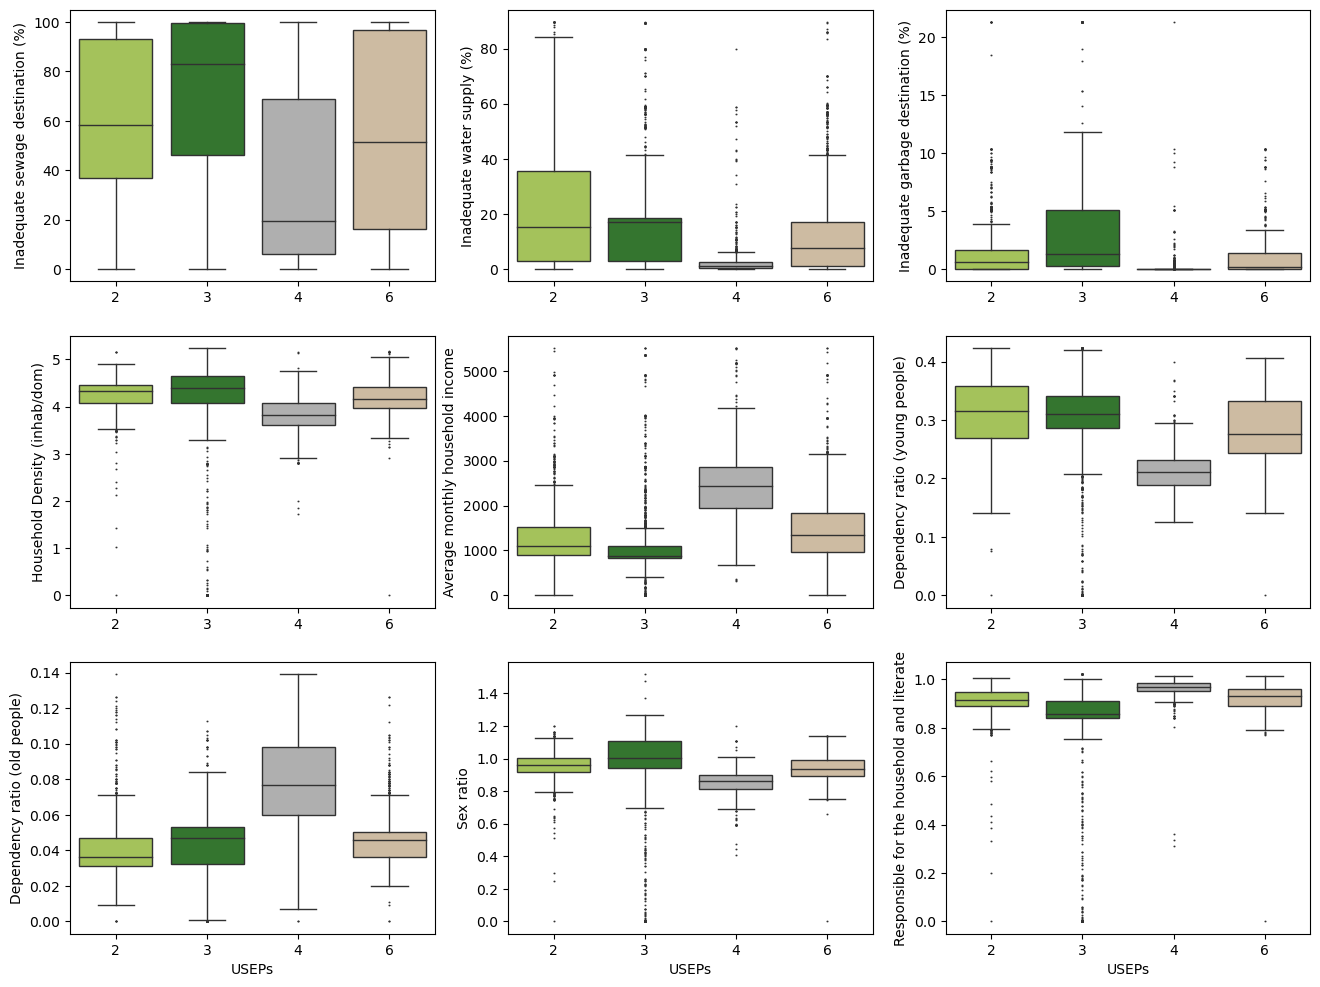

In [24]:
fig, axes = plt.subplots(3,3, figsize=(16, 12))

sns.boxplot(ax=axes[0,0], x='C_ENV_URB', y= obj['inad_sewag'],  
            linewidth = 1,palette = paleta, fliersize = 0.5, data = obj).set(ylabel='Inadequate sewage destination (%)', xlabel= None)
axes[0,0].set_xticklabels(['2','3','4','6'])

sns.boxplot(ax=axes[0,1], x='C_ENV_URB', y= obj['inad_water'],  
            linewidth = 1,palette = paleta, fliersize = 0.5, data = obj).set(ylabel='Inadequate water supply (%)', xlabel= None)
axes[0,1].set_xticklabels(['2','3','4','6'])

sns.boxplot(ax=axes[0,2],x='C_ENV_URB', y= obj['inap_waste'],  
            linewidth = 1,palette = paleta, fliersize = 0.5, data = obj).set(ylabel='Inadequate garbage destination (%)', xlabel= None)
axes[0,2].set_xticklabels(['2','3','4','6'])

sns.boxplot(ax=axes[1,0], x='C_ENV_URB', y= obj['p_per_hous'],
            linewidth = 1,palette = paleta, fliersize = 0.5, data = obj).set(ylabel='Household Density (inhab/dom)', xlabel= None)
axes[1,0].set_xticklabels(['2','3','4','6'])

sns.boxplot(ax=axes[1,1], x='C_ENV_URB', y= obj['avg_inv_ho'], 
            linewidth = 1,palette = paleta, fliersize = 0.5, data = obj).set(ylabel='Average monthly household income', xlabel= None)
axes[1,1].set_xticklabels(['2','3','4','6'])


sns.boxplot(ax=axes[1,2], x='C_ENV_URB', y= obj['dr_15'], linewidth = 1,palette = paleta, fliersize = 0.5, data = obj).set(ylabel='Dependency ratio (young people)', xlabel= None)
axes[1,2].set_xticklabels(['2','3','4','6'])

sns.boxplot(ax=axes[2,0], x='C_ENV_URB', y= obj['dr_65'],  
            linewidth = 1,palette = paleta, fliersize = 0.5, data = obj).set(ylabel='Dependency ratio (old people)', xlabel='USEPs')
axes[2,0].set_xticklabels(['2','3','4','6'])

sns.boxplot(ax=axes[2,1],x='C_ENV_URB', y= obj['sex_ratio'], 
            linewidth = 1,palette = paleta, fliersize = 0.5, data = obj).set(ylabel='Sex ratio', xlabel='USEPs')
axes[2,1].set_xticklabels(['2','3','4','6'])

sns.boxplot(ax=axes[2,2],x='C_ENV_URB', y= obj['literacy'],
            linewidth = 1,palette = paleta, fliersize = 0.5, data = obj).set(ylabel='Responsible for the household and literate', xlabel='USEPs')
axes[2,2].set_xticklabels(['2','3','4','6'])

plt.show()

In [49]:
obj.to_excel('cameta_indicators_socioeconomical.xlsx')

In [164]:
obj.iloc[:,:-5]

,avg_inv_ho,p_per_hous,inad_sewag,inad_water,inap_waste,dr_15,dr_65,sex_ratio,literacy
2,5346.224,2.787,4.254,89.343,0.000,0.242,0.000,1.183,1.021
3,5346.224,2.787,4.254,89.343,0.000,0.242,0.000,1.183,1.021
4,5346.224,2.787,4.254,89.343,0.000,0.242,0.000,1.183,1.021
5,845.487,3.684,15.066,58.896,0.000,0.297,0.071,1.007,0.890
6,845.487,3.684,15.066,58.896,0.000,0.297,0.071,1.007,0.890
...,...,...,...,...,...,...,...,...,...
6272,5159.537,3.342,93.547,1.375,0.035,0.166,0.122,0.749,0.989
6278,1055.031,4.307,84.076,70.819,6.275,0.308,0.086,1.150,0.868
6279,1549.602,4.349,66.740,53.126,4.547,0.289,0.084,1.092,0.885
6280,2023.117,4.303,50.222,39.351,3.316,0.271,0.088,1.012,0.905


In [92]:
X = pd.DataFrame(obj.iloc[:,2:-5])
Y = pd.DataFrame(obj['C_ENV_URB']).to_numpy()

In [93]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, stratify = Y, random_state=42)

In [94]:
parametros = {'criterion':['gini','entropy','log_loss'],
              'splitter':['best','random'],
              'max_depth':[3,4],
              'min_samples_split':[5,10,20,30, None],
              'min_samples_leaf': [5,10,20,30, None]
             }

In [95]:
modelo = GridSearchCV(estimator = DecisionTreeClassifier(), verbose=2, param_grid = parametros, scoring='accuracy', n_jobs=-1, cv=5)

In [96]:
modelo.fit(x_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


C:\Users\brdia\anaconda3\envs\environment\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
540 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\brdia\anaconda3\envs\environment\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\brdia\anaconda3\envs\environment\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "C:\Users\brdia\anaconda3\envs\environment\lib\site-packages\sklearn\tree\_classes.py", line 273, in fit
    check_scalar(
  File "C:\Us

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4],
                         'min_samples_leaf': [5, 10, 20, 30, None],
                         'min_samples_split': [5, 10, 20, 30, None],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=2)

In [97]:
modelo.best_score_

0.6030769230769232

In [98]:
modelo.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=30)

In [99]:
y_pred = modelo.predict(x_test)

<BarContainer object of 5 artists>

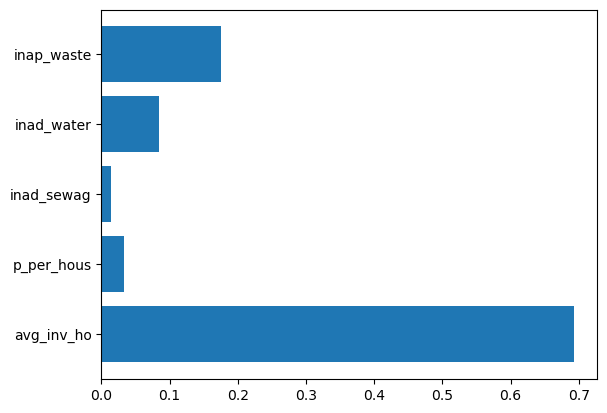

In [100]:
plt.barh(x_test.columns, modelo.best_estimator_.feature_importances_ )

In [101]:
macro = f1_score(y_test, y_pred, average = 'macro')
wei = f1_score(y_test, y_pred, average = 'weighted')
accuracy = accuracy_score(y_test, y_pred)

results = {'F1_Score_Macro': macro,
             'F1_Score_Weighted': wei,
             'Global Acuraccy': accuracy 
            }

pd.DataFrame.from_dict(results, orient='index', dtype=None, columns=['Métricas'])

,Métricas
F1_Score_Macro,0.524878
F1_Score_Weighted,0.579898
Global Acuraccy,0.601933


In [102]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 44  83  21  55]
 [ 36 433  10  52]
 [  4   8 111  23]
 [ 29  84  48  97]]
              precision    recall  f1-score   support

           1       0.39      0.22      0.28       203
           2       0.71      0.82      0.76       531
           3       0.58      0.76      0.66       146
           5       0.43      0.38      0.40       258

    accuracy                           0.60      1138
   macro avg       0.53      0.54      0.52      1138
weighted avg       0.57      0.60      0.58      1138



In [103]:
data = {'Reference': y_test.flatten(), 'Predicted': y_pred}
df = pd.DataFrame(data, columns = ['Reference','Predicted'])
mc = pd.crosstab(df['Reference'], df['Predicted'], rownames=['Reference'], colnames=['Predicted'])

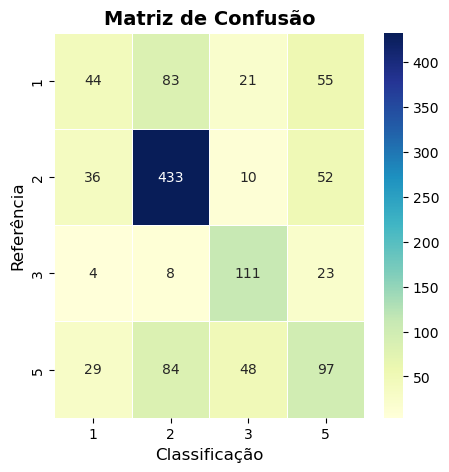

In [104]:
plt.figure(figsize=(5,5))
sns.heatmap(mc, annot=True,fmt='g',  cmap = 'YlGnBu',linewidths=.5)
plt.title('Matriz de Confusão', fontweight='bold', fontsize=14)
plt.xlabel('Classificação', fontsize=12)
plt.ylabel('Referência',fontsize=12)
plt.show()

In [105]:
clf = modelo.best_estimator_

In [106]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 31 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 0] <= 1207.4099731445312 else to node 16.
	node=1 is a split node: go to node 2 if X[:, 0] <= 770.4984741210938 else to node 9.
		node=2 is a split node: go to node 3 if X[:, 3] <= 41.09600067138672 else to node 6.
			node=3 is a split node: go to node 4 if X[:, 1] <= 4.498500108718872 else to node 5.
				node=4 is a leaf node.
				node=5 is a leaf node.
			node=6 is a split node: go to node 7 if X[:, 2] <= 92.2249984741211 else to node 8.
				node=7 is a leaf node.
				node=8 is a leaf node.
		node=9 is a split node: go to node 10 if X[:, 4] <= 1.1899999976158142 else to node 13.
			node=10 is a split node: go to node 11 if X[:, 0] <= 1003.5924987792969 else to node 12.
				node=11 is a leaf node.
				node=12 is a leaf node.
			node=13 is a split node: go to node 14 if X[:, 4] <= 5.3450000286102295 else to node 15.
				node=14 is a leaf node.
				node=15 is a leaf

In [108]:
TARGET = 'TARGET'

target = []
cont = 0

for classe in obj['C_ENV_URB'].unique():
    if not pd.isnull(classe):
        target.append(str(classe))

target

['2', '1', '3', '5']

In [109]:
obj

,ID,C_ENV_URB,avg_inv_ho,p_per_hous,inad_sewag,inad_water,inap_waste,dr_15,dr_65,sex_ratio,literacy,geometry
2,10,2,5346.224,2.787,4.254,89.343,0.000,0.242,0.000,1.183,1.021,"POLYGON ((753189.831 9722814.381, 753190.263 9..."
3,11,2,5346.224,2.787,4.254,89.343,0.000,0.242,0.000,1.183,1.021,"POLYGON ((753290.015 9722813.949, 753290.447 9..."
4,12,2,5346.224,2.787,4.254,89.343,0.000,0.242,0.000,1.183,1.021,"POLYGON ((753390.199 9722813.517, 753390.631 9..."
5,30,2,845.487,3.684,15.066,58.896,0.000,0.297,0.071,1.007,0.890,"POLYGON ((760603.631 9722783.078, 760604.045 9..."
6,31,2,845.487,3.684,15.066,58.896,0.000,0.297,0.071,1.007,0.890,"POLYGON ((760703.820 9722782.664, 760704.234 9..."
...,...,...,...,...,...,...,...,...,...,...,...,...
6272,14189,3,5159.537,3.342,93.547,1.375,0.035,0.166,0.122,0.749,0.989,"POLYGON ((754334.099 9732700.362, 754334.522 9..."
6278,14220,1,1055.031,4.307,84.076,70.819,6.275,0.308,0.086,1.150,0.868,"POLYGON ((751329.771 9732813.093, 751330.202 9..."
6279,14221,5,1549.602,4.349,66.740,53.126,4.547,0.289,0.084,1.092,0.885,"POLYGON ((751429.928 9732812.662, 751430.359 9..."
6280,14222,5,2023.117,4.303,50.222,39.351,3.316,0.271,0.088,1.012,0.905,"POLYGON ((751530.086 9732812.231, 751530.516 9..."


In [110]:
obj.columns

Index(['ID', 'C_ENV_URB', 'avg_inv_ho', 'p_per_hous', 'inad_sewag',
       'inad_water', 'inap_waste', 'dr_15', 'dr_65', 'sex_ratio', 'literacy',
       'geometry'],
      dtype='object')

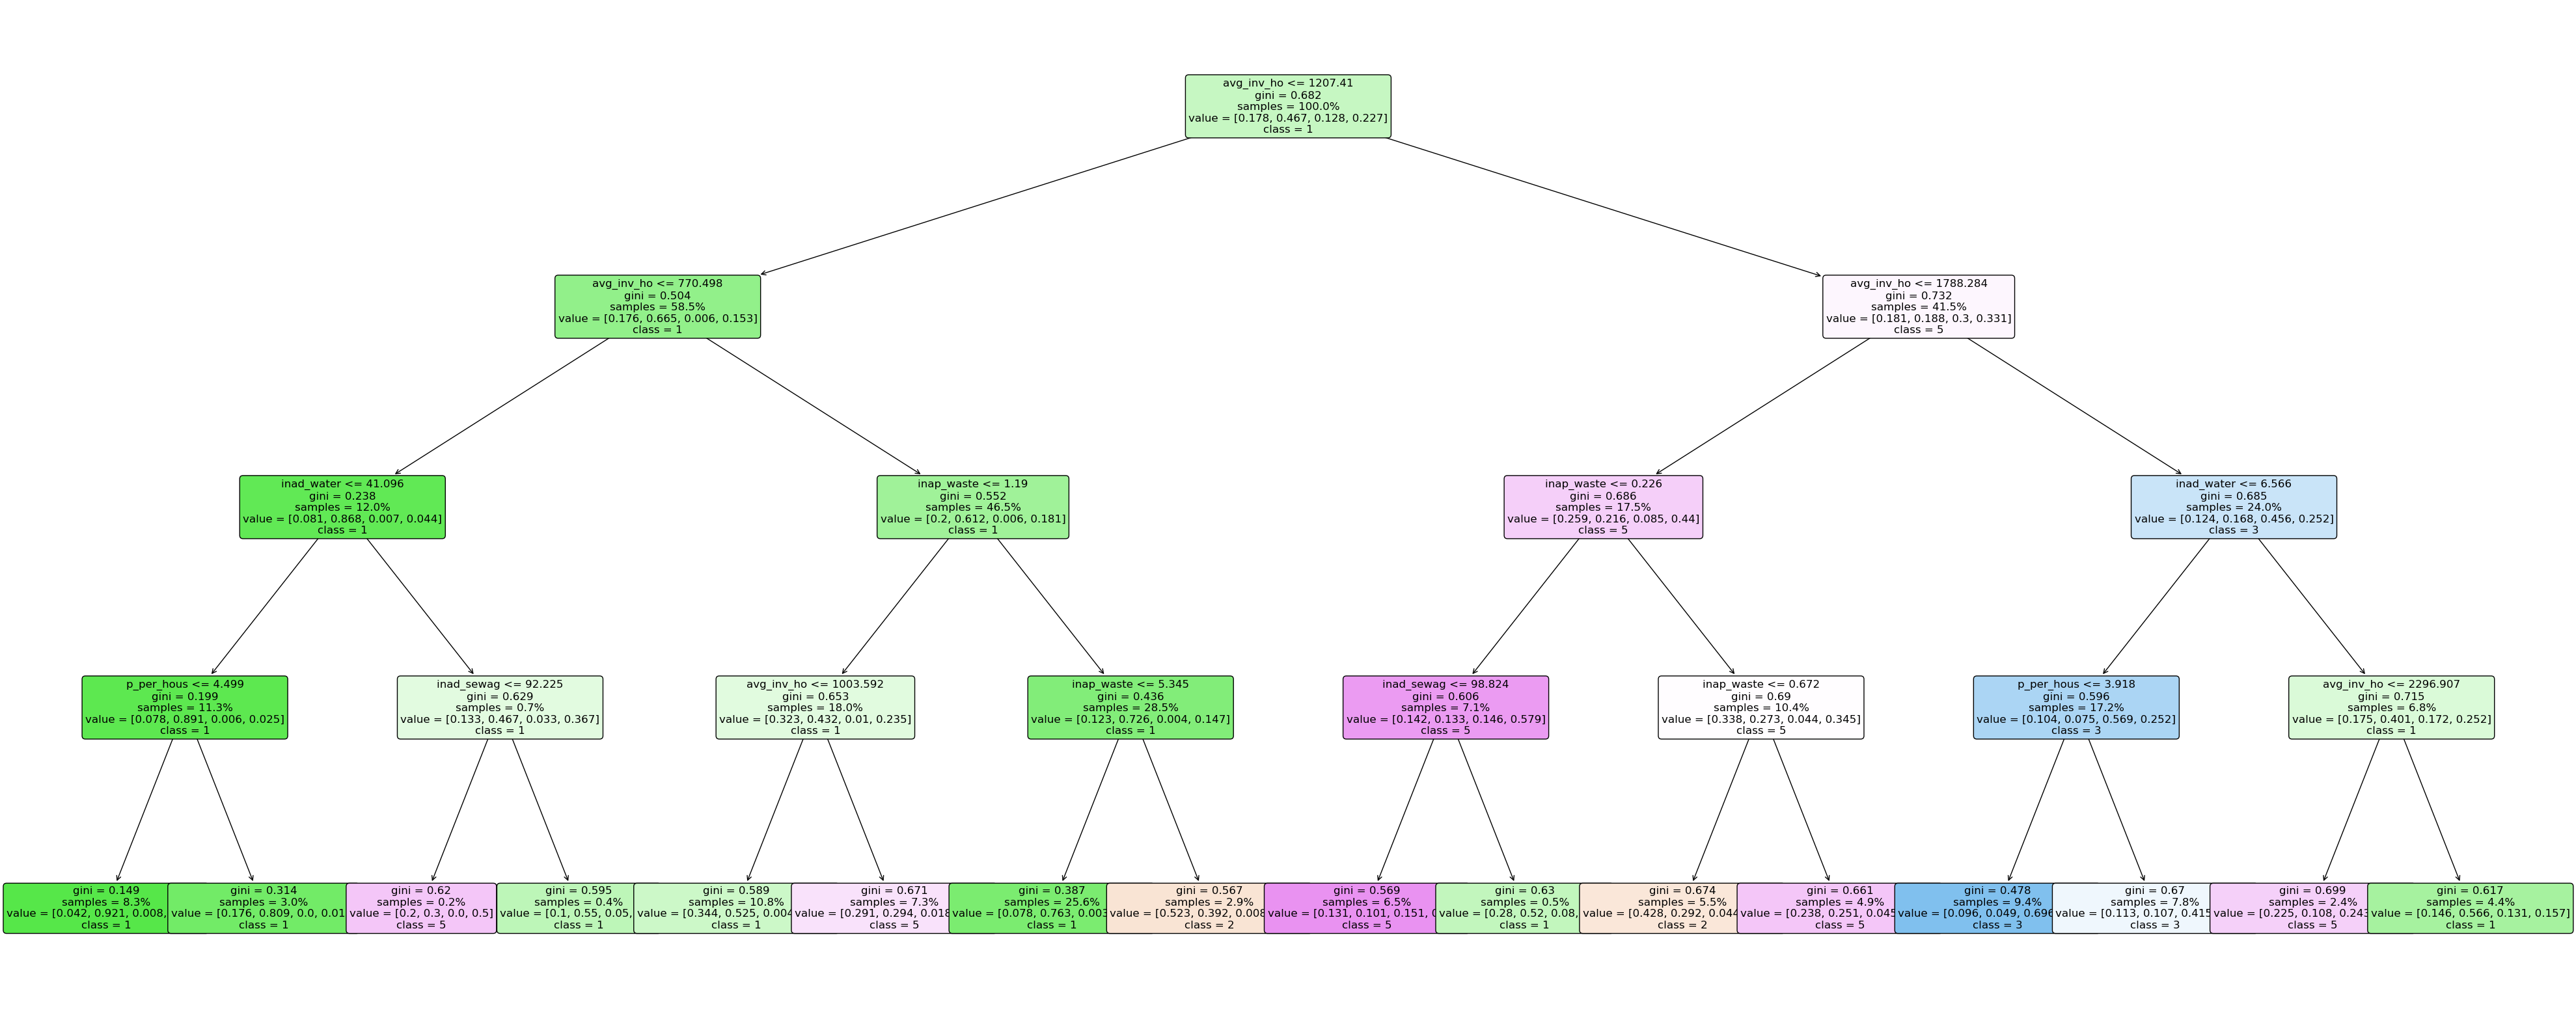

In [111]:
plt_1 = plt.figure(figsize=(50,20))


tree.plot_tree(clf, fontsize=12,proportion = 1, precision = 3, feature_names = list(obj.iloc[:,2:-1].columns),  
                      class_names = target, filled = 1, rounded=True)
plt.show()

In [160]:
obj[(obj['avg_inv_ho'] <= 1207.41) & (obj['avg_inv_ho'] <= 770.498) & (obj['inad_water'] <= 41.09)].groupby('C_ENV_URB').count()['ID']

C_ENV_URB
1     50
2    553
3      4
5     17
Name: ID, dtype: int64

In [159]:
obj[(obj['avg_inv_ho'] <= 1207.41) & (obj['avg_inv_ho'] <= 770.498) & (obj['inad_water'] > 41.09) & (obj['inad_sewag'] <= 92.22)].groupby('C_ENV_URB').count()['ID']

C_ENV_URB
1    2
2    5
5    5
Name: ID, dtype: int64

In [158]:
obj[(obj['avg_inv_ho'] <= 1207.41) & (obj['avg_inv_ho'] <= 770.498) & (obj['inad_water'] > 41.09) & (obj['inad_sewag'] > 92.22)].groupby('C_ENV_URB').count()['ID']

C_ENV_URB
1     3
2    14
3     1
5     8
Name: ID, dtype: int64

In [157]:
obj[(obj['avg_inv_ho'] <= 1207.41) & (obj['avg_inv_ho'] > 770.498) & (obj['inap_waste'] <= 1.19) & (obj['avg_inv_ho'] <= 1003.60)].groupby('C_ENV_URB').count()['ID']

C_ENV_URB
1    210
2    330
3      2
5     84
Name: ID, dtype: int64

In [156]:
obj[(obj['avg_inv_ho'] <= 1207.41) & (obj['avg_inv_ho'] > 770.498) & (obj['inap_waste'] <= 1.19) & (obj['avg_inv_ho'] > 1003.60)].groupby('C_ENV_URB').count()['ID']

C_ENV_URB
1    123
2    120
3      7
5    159
Name: ID, dtype: int64

In [155]:
obj[(obj['avg_inv_ho'] <= 1207.41) & (obj['avg_inv_ho'] > 770.498) & (obj['inap_waste'] > 1.19)].groupby('C_ENV_URB').count()['ID']

C_ENV_URB
1     210
2    1195
3       8
5     244
Name: ID, dtype: int64

In [154]:
obj[(obj['avg_inv_ho'] > 1207.41) & (obj['avg_inv_ho'] <= 1788.28) & (obj['inap_waste'] <= 0.23) & (obj['inad_sewag'] <= 98.82)].groupby('C_ENV_URB').count()['ID']

C_ENV_URB
1     71
2     40
3     57
5    229
Name: ID, dtype: int64

In [153]:
obj[(obj['avg_inv_ho'] > 1207.41) & (obj['avg_inv_ho'] <= 1788.28) & (obj['inap_waste'] <= 0.23) & (obj['inad_sewag'] > 98.82)].groupby('C_ENV_URB').count()['ID']

C_ENV_URB
1     7
2    19
3     2
5     5
Name: ID, dtype: int64

In [152]:
obj[(obj['avg_inv_ho'] > 1207.41) & (obj['avg_inv_ho'] <= 1788.28) & (obj['inap_waste'] > 0.23)].groupby('C_ENV_URB').count()['ID']

C_ENV_URB
1    172
2    163
3     30
5    204
Name: ID, dtype: int64

In [151]:
obj[(obj['avg_inv_ho'] > 1207.41) & (obj['avg_inv_ho'] > 1788.28) & (obj['inad_water'] <= 6.57) & (obj['p_per_hous'] <= 3.92)].groupby('C_ENV_URB').count()['ID']

C_ENV_URB
1     55
2     21
3    368
5     96
Name: ID, dtype: int64

In [150]:
obj[(obj['avg_inv_ho'] > 1207.41) & (obj['avg_inv_ho'] > 1788.28) & (obj['inad_water'] <= 6.57) & (obj['p_per_hous'] > 3.92)].groupby('C_ENV_URB').count()['ID']

C_ENV_URB
1     47
2     48
3    188
5    149
Name: ID, dtype: int64

In [149]:
obj[(obj['avg_inv_ho'] > 1207.41) & (obj['avg_inv_ho'] > 1788.28) & (obj['inad_water'] > 6.57) & (obj['avg_inv_ho'] <= 2296.91)].groupby('C_ENV_URB').count()['ID']

C_ENV_URB
1    31
2    13
3    31
5    55
Name: ID, dtype: int64

In [161]:
obj[(obj['avg_inv_ho'] > 1207.41) & (obj['avg_inv_ho'] > 1788.28) & (obj['inad_water'] > 6.57) & (obj['avg_inv_ho'] > 2296.91)].groupby('C_ENV_URB').count()['ID']

C_ENV_URB
1     31
2    135
3     31
5     36
Name: ID, dtype: int64

In [87]:
obj.iloc[:,7:-1]

,dr_15,dr_65,sex_ratio,literacy
2,0.242,0.000,1.175,1.012
3,0.242,0.000,1.175,1.012
4,0.242,0.000,1.175,1.012
5,0.296,0.070,0.996,0.872
6,0.296,0.070,0.996,0.872
...,...,...,...,...
6272,0.166,0.122,0.748,0.989
6278,0.312,0.086,1.158,0.862
6279,0.296,0.084,1.106,0.875
6280,0.269,0.090,0.978,0.907


In [173]:
obj

,ID,C_ENV_URB,avg_inv_ho,p_per_hous,inad_sewag,inad_water,inap_waste,dr_15,dr_65,sex_ratio,literacy,geometry
2,10,2,5346.224,2.787,4.254,89.343,0.000,0.242,0.000,1.183,1.021,"POLYGON ((753189.831 9722814.381, 753190.263 9..."
3,11,2,5346.224,2.787,4.254,89.343,0.000,0.242,0.000,1.183,1.021,"POLYGON ((753290.015 9722813.949, 753290.447 9..."
4,12,2,5346.224,2.787,4.254,89.343,0.000,0.242,0.000,1.183,1.021,"POLYGON ((753390.199 9722813.517, 753390.631 9..."
5,30,2,845.487,3.684,15.066,58.896,0.000,0.297,0.071,1.007,0.890,"POLYGON ((760603.631 9722783.078, 760604.045 9..."
6,31,2,845.487,3.684,15.066,58.896,0.000,0.297,0.071,1.007,0.890,"POLYGON ((760703.820 9722782.664, 760704.234 9..."
...,...,...,...,...,...,...,...,...,...,...,...,...
6272,14189,3,5159.537,3.342,93.547,1.375,0.035,0.166,0.122,0.749,0.989,"POLYGON ((754334.099 9732700.362, 754334.522 9..."
6278,14220,1,1055.031,4.307,84.076,70.819,6.275,0.308,0.086,1.150,0.868,"POLYGON ((751329.771 9732813.093, 751330.202 9..."
6279,14221,5,1549.602,4.349,66.740,53.126,4.547,0.289,0.084,1.092,0.885,"POLYGON ((751429.928 9732812.662, 751430.359 9..."
6280,14222,5,2023.117,4.303,50.222,39.351,3.316,0.271,0.088,1.012,0.905,"POLYGON ((751530.086 9732812.231, 751530.516 9..."


In [171]:
X = pd.DataFrame(obj.iloc[:,2:-1])
Y = pd.DataFrame(obj['C_ENV_URB']).to_numpy()

In [172]:
x_test

,avg_inv_ho,p_per_hous,inad_sewag,inad_water,inap_waste,dr_15,dr_65,sex_ratio,literacy
3657,1557.343,4.280,6.386,0.200,0.000,0.261,0.034,0.973,0.947
1176,153.254,4.631,14.321,0.339,0.000,0.058,0.006,0.161,0.147
4949,863.748,4.649,99.994,17.196,5.095,0.341,0.047,1.110,0.841
2995,1914.679,4.173,55.553,59.553,0.000,0.302,0.031,0.882,0.929
680,1161.508,4.370,97.201,2.505,1.287,0.307,0.059,0.967,0.931
...,...,...,...,...,...,...,...,...,...
2712,1620.064,4.064,5.521,2.454,0.000,0.262,0.041,1.054,0.963
2283,827.713,4.435,54.775,69.979,8.772,0.360,0.025,1.026,0.903
3594,821.451,4.377,67.567,21.195,0.284,0.373,0.032,1.002,0.886
2871,1225.534,4.137,18.602,0.026,0.158,0.271,0.049,0.979,0.899


In [174]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, stratify = Y, random_state=42)

In [175]:
parametros = {'criterion':['gini','entropy','log_loss'],
              'splitter':['best','random'],
              'max_depth':[3,4],
              'min_samples_split':[5,10,20,30, None],
              'min_samples_leaf': [5,10,20,30, None]
             }

In [176]:
modelo = GridSearchCV(estimator = DecisionTreeClassifier(), verbose=2, param_grid = parametros, scoring='accuracy', n_jobs=-1, cv=5)

In [177]:
modelo.fit(x_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


C:\Users\brdia\anaconda3\envs\environment\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
540 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\brdia\anaconda3\envs\environment\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\brdia\anaconda3\envs\environment\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "C:\Users\brdia\anaconda3\envs\environment\lib\site-packages\sklearn\tree\_classes.py", line 273, in fit
    check_scalar(
  File "C:\Us

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4],
                         'min_samples_leaf': [5, 10, 20, 30, None],
                         'min_samples_split': [5, 10, 20, 30, None],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=2)

In [178]:
modelo.best_score_

0.6184615384615385

In [179]:
modelo.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=5)

In [180]:
clf = modelo.best_estimator_

In [181]:
y_pred = modelo.predict(x_test)

<BarContainer object of 9 artists>

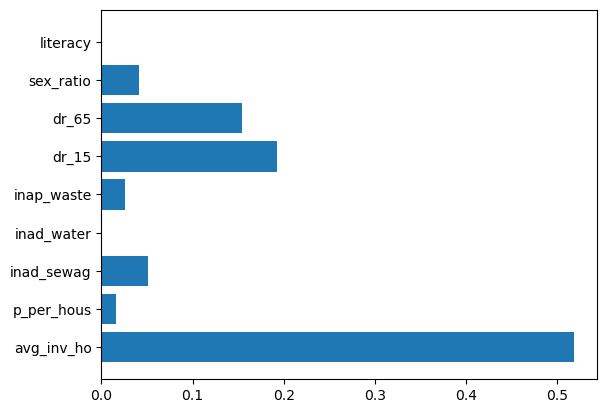

In [182]:
plt.barh(x_test.columns, modelo.best_estimator_.feature_importances_ )

In [183]:
macro = f1_score(y_test, y_pred, average = 'macro')
wei = f1_score(y_test, y_pred, average = 'weighted')
accuracy = accuracy_score(y_test, y_pred)

results = {'F1_Score_Macro': macro,
             'F1_Score_Weighted': wei,
             'Global Acuraccy': accuracy 
            }

pd.DataFrame.from_dict(results, orient='index', dtype=None, columns=['Métricas'])

,Métricas
F1_Score_Macro,0.597819
F1_Score_Weighted,0.634831
Global Acuraccy,0.628295


In [184]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 95  38  14  56]
 [ 89 390   3  49]
 [  2   8  96  40]
 [ 49  59  16 134]]
              precision    recall  f1-score   support

           1       0.40      0.47      0.43       203
           2       0.79      0.73      0.76       531
           3       0.74      0.66      0.70       146
           5       0.48      0.52      0.50       258

    accuracy                           0.63      1138
   macro avg       0.60      0.59      0.60      1138
weighted avg       0.64      0.63      0.63      1138



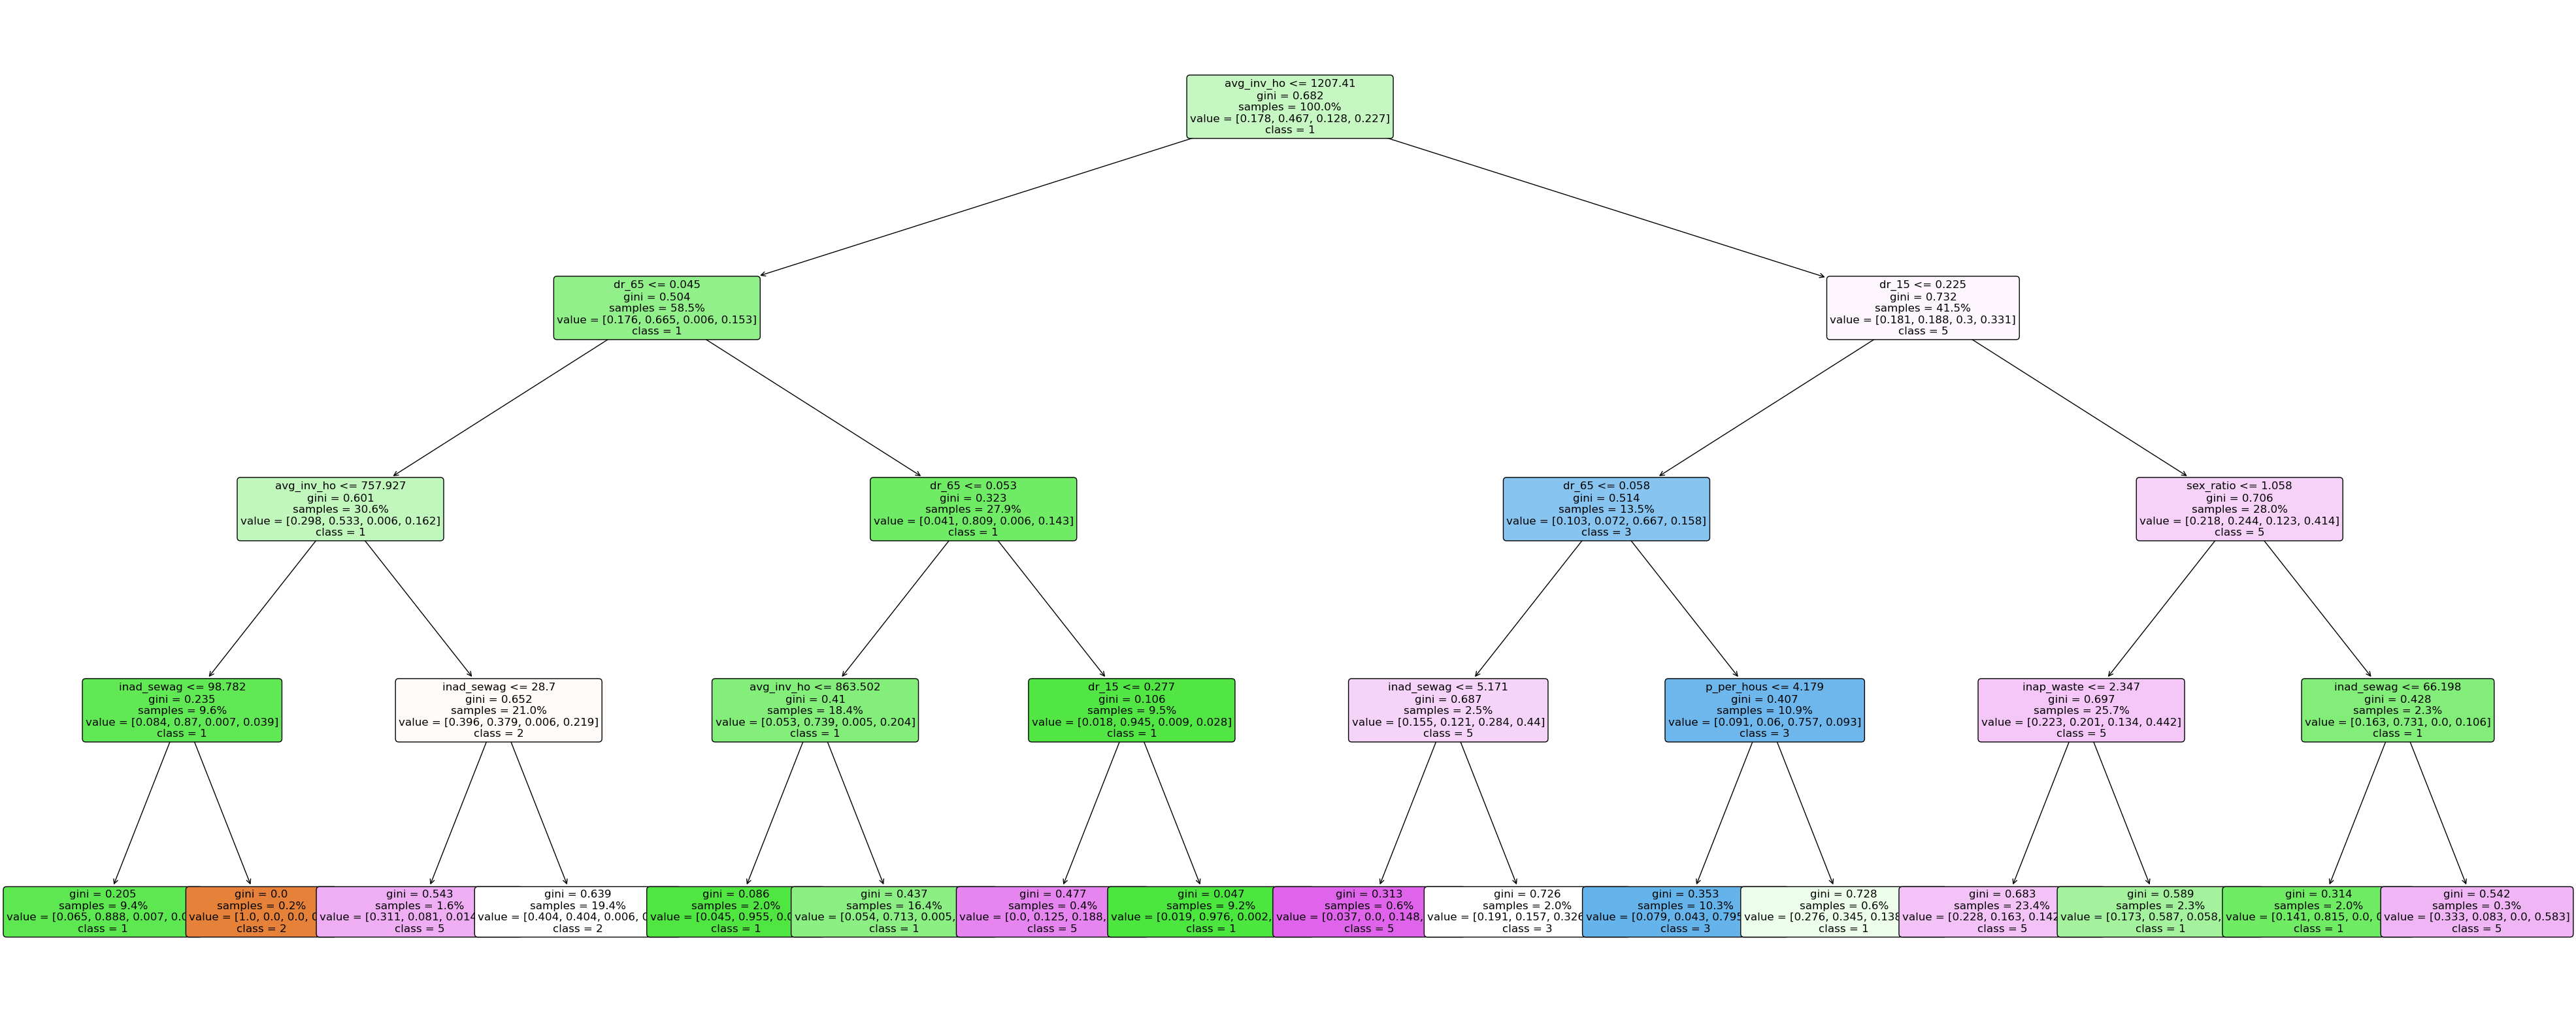

In [186]:
plt_1 = plt.figure(figsize=(50,20))

tree.plot_tree(clf, fontsize=12,proportion = 1, precision = 3, feature_names = list(obj.iloc[:,2:-1].columns),  
                      class_names = target, filled = 1, rounded=True)
plt.show()

In [187]:
list(obj.iloc[:,2:-1].columns)

['avg_inv_ho',
 'p_per_hous',
 'inad_sewag',
 'inad_water',
 'inap_waste',
 'dr_15',
 'dr_65',
 'sex_ratio',
 'literacy']

In [231]:
obj.iloc[:,1:-1].groupby('C_ENV_URB').describe()

avg_inv_ho                                                        \
               count         mean         std      min       25%       50%   
C_ENV_URB                                                                    
1             1012.0  1348.387592  737.650419    0.000   892.960  1095.405   
2             2656.0  1065.863428  754.840666    0.000   821.451   870.130   
3              729.0  2495.231262  835.387231  318.584  1950.929  2441.889   
5             1291.0  1544.013603  780.221391    0.000   970.041  1347.004   

                               p_per_hous            ... sex_ratio         \
                 75%       max      count      mean  ...       75%    max   
C_ENV_URB                                            ...                    
1          1526.1580  5507.813     1012.0  4.240354  ...    1.0020  1.199   
2          1095.9970  5507.813     2656.0  4.094161  ...    1.1100  1.517   
3          2850.9550  5507.813      729.0  3.820571  ...    0.9010  1.199   
5          1840.3645  5507.813     1291.0  4.189114  ...    0.9915  1.138   

          literacy                                                        
             count      mean       std   min    25%    50%    75%    max  
C_ENV_URB                                                                 
1           1012.0  0.909349  0.070149  0.00  0.888  0.913  0.949  1.004  
2           2656.0  0.812592  0.224245  0.00  0.841  0.859  0.912  1.021  
3            729.0  0.962642  0.049178  0.31  0.952  0.969  0.984  1.014  
5           1291.0  0.919009  0.056832  0.00  0.889  0.932  0.960  1.014  

[4 rows x 72 columns]

In [212]:
obj[(obj['avg_inv_ho'] <= 1207.41) & (obj['dr_65'] <= 0.045)  & (obj['avg_inv_ho'] <= 757.927) & (obj['inad_sewag'] <= 98.782) ].groupby('C_ENV_URB').count()['ID']

C_ENV_URB
1     35
2    462
3      4
5     21
Name: ID, dtype: int64

In [213]:
obj[(obj['avg_inv_ho'] <= 1207.41) & (obj['dr_65'] <= 0.045)  & (obj['avg_inv_ho'] <= 757.927) & (obj['inad_sewag'] > 98.782) ].groupby('C_ENV_URB').count()['ID']

C_ENV_URB
1    10
2     1
Name: ID, dtype: int64

In [214]:
obj[(obj['avg_inv_ho'] <= 1207.41) & (obj['dr_65'] <= 0.045)  & (obj['avg_inv_ho'] > 757.927) & (obj['inad_sewag'] <= 28.7)].groupby('C_ENV_URB').count()['ID']

C_ENV_URB
1    26
2    10
3     1
5    56
Name: ID, dtype: int64

In [215]:
obj[(obj['avg_inv_ho'] <= 1207.41) & (obj['dr_65'] <= 0.045)  & (obj['avg_inv_ho'] > 757.927) & (obj['inad_sewag'] > 28.7)].groupby('C_ENV_URB').count()['ID']

C_ENV_URB
1    452
2    450
3      7
5    214
Name: ID, dtype: int64

In [216]:
obj[(obj['avg_inv_ho'] <= 1207.41) & (obj['dr_65'] > 0.045)  & (obj['dr_65'] <= 0.053)].groupby('C_ENV_URB').count()['ID']

C_ENV_URB
1     65
2    853
3      6
5    215
Name: ID, dtype: int64

In [217]:
obj[(obj['avg_inv_ho'] <= 1207.41) & (obj['dr_65'] > 0.045)  & (obj['dr_65'] > 0.053) & (obj['dr_15'] <= 0.277)].groupby('C_ENV_URB').count()['ID']

C_ENV_URB
2     2
3     3
5    11
Name: ID, dtype: int64

In [218]:
obj[(obj['avg_inv_ho'] <= 1207.41) & (obj['dr_65'] > 0.045)  & (obj['dr_65'] > 0.053) & (obj['dr_15'] > 0.277)].groupby('C_ENV_URB').count()['ID']

C_ENV_URB
1     10
2    439
3      1
Name: ID, dtype: int64

In [219]:
obj[(obj['avg_inv_ho'] > 1207.41) & (obj['dr_15'] <= 0.225)  & (obj['dr_65'] <= 0.058) & (obj['inad_sewag'] <= 5.171)].groupby('C_ENV_URB').count()['ID']

C_ENV_URB
1     2
3     5
5    27
Name: ID, dtype: int64

In [220]:
obj[(obj['avg_inv_ho'] > 1207.41) & (obj['dr_15'] <= 0.225)  & (obj['dr_65'] <= 0.058) & (obj['inad_sewag'] > 5.171)].groupby('C_ENV_URB').count()['ID']

C_ENV_URB
1    22
2    18
3    35
5    42
Name: ID, dtype: int64

In [221]:
obj[(obj['avg_inv_ho'] > 1207.41) & (obj['dr_15'] <= 0.225)  & (obj['dr_65'] > 0.058) & (obj['p_per_hous'] <= 4.179)].groupby('C_ENV_URB').count()['ID']

C_ENV_URB
1     47
2     23
3    465
5     47
Name: ID, dtype: int64

In [222]:
obj[(obj['avg_inv_ho'] > 1207.41) & (obj['dr_15'] <= 0.225)  & (obj['dr_65'] > 0.058) & (obj['p_per_hous'] > 4.179)].groupby('C_ENV_URB').count()['ID']

C_ENV_URB
1     8
2    15
3     6
5    10
Name: ID, dtype: int64

In [223]:
obj[(obj['avg_inv_ho'] > 1207.41) & (obj['dr_15'] > 0.225)  & (obj['sex_ratio'] <= 1.058) & (obj['inap_waste'] <= 2.347)].groupby('C_ENV_URB').count()['ID']

C_ENV_URB
1    294
2    218
3    187
5    610
Name: ID, dtype: int64

In [224]:
obj[(obj['avg_inv_ho'] > 1207.41) & (obj['dr_15'] > 0.225)  & (obj['sex_ratio'] <= 1.058) & (obj['inap_waste'] > 2.347)].groupby('C_ENV_URB').count()['ID']

C_ENV_URB
1    22
2    75
3     8
5    24
Name: ID, dtype: int64

In [225]:
obj[(obj['avg_inv_ho'] > 1207.41) & (obj['dr_15'] > 0.225)  & (obj['sex_ratio'] > 1.058) & (obj['inad_sewag'] <= 66.198)].groupby('C_ENV_URB').count()['ID']

C_ENV_URB
1    15
2    89
3     1
5     7
Name: ID, dtype: int64

In [226]:
obj[(obj['avg_inv_ho'] > 1207.41) & (obj['dr_15'] > 0.225)  & (obj['sex_ratio'] > 1.058) & (obj['inad_sewag'] > 66.198)].groupby('C_ENV_URB').count()['ID']

C_ENV_URB
1    4
2    1
5    7
Name: ID, dtype: int64

In [101]:
obj

,ID,MODES_10,avg_inv_ho,p_per_hous,inad_sewag,inad_water,inap_waste,dr_15,dr_65,sex_ratio,literacy,geometry
2,10,0,5300.842,2.763,0.042,0.886,0.000,0.242,0.000,1.175,1.012,"POLYGON ((753189.831 9722814.381, 753190.263 9..."
3,11,0,5300.870,2.763,0.042,0.886,0.000,0.242,0.000,1.175,1.012,"POLYGON ((753290.015 9722813.949, 753290.447 9..."
4,12,0,5300.897,2.763,0.042,0.886,0.000,0.242,0.000,1.175,1.012,"POLYGON ((753390.199 9722813.517, 753390.631 9..."
5,30,0,828.462,3.610,0.148,0.577,0.000,0.296,0.070,0.996,0.872,"POLYGON ((760603.631 9722783.078, 760604.045 9..."
6,31,0,828.478,3.610,0.148,0.577,0.000,0.296,0.070,0.996,0.872,"POLYGON ((760703.820 9722782.664, 760704.234 9..."
...,...,...,...,...,...,...,...,...,...,...,...,...
6272,14189,5,5166.083,3.337,0.934,0.012,0.000,0.166,0.122,0.748,0.989,"POLYGON ((754334.099 9732700.362, 754334.522 9..."
6278,14220,1,934.935,4.287,0.880,0.748,0.067,0.312,0.086,1.158,0.862,"POLYGON ((751329.771 9732813.093, 751330.202 9..."
6279,14221,8,1334.440,4.319,0.739,0.605,0.053,0.296,0.084,1.106,0.875,"POLYGON ((751429.928 9732812.662, 751430.359 9..."
6280,14222,8,2068.393,4.255,0.484,0.390,0.033,0.269,0.090,0.978,0.907,"POLYGON ((751530.086 9732812.231, 751530.516 9..."


In [469]:
obj.to_excel("D:\\00_INPE\\0_DISSERTACAO\\0_BASE_VETOR\\SOCIOECONOMICO\\umars_indicators.xlsx")